In [114]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

train= pd.read_csv("train.csv",parse_dates=["Dates"],index_col=False)

train.head()

train = train.drop(["Descript","Resolution"],axis=1)

def datesplit(data):
    data["Year"] = data["Dates"].dt.year
    data["Month"] = data["Dates"].dt.month
    data["Day"] = data["Dates"].dt.day
    data["Hour"] = data["Dates"].dt.hour
    data["Minute"] = data["Dates"].dt.minute
    return data

train= datesplit(train)

train.head()

#train = pd.concat([train,pd.get_dummies(train.Category)], axis=1)

cat_encoder=LabelEncoder()
cat_encoder.fit(train["Category"])
cat_encoder.classes_.shape

train["CategoryEncoded"] = cat_encoder.transform(train["Category"])

train["CategoryEncoded"].head()

train["Category"] = train["CategoryEncoded"]

train = pd.concat([train,pd.get_dummies(train.PdDistrict)], axis=1)
train = pd.concat([train,pd.get_dummies(train.DayOfWeek)], axis=1)

add_encoder = LabelEncoder()

train['StreetNo'] = train['Address'].apply(lambda x: x.split(' ', 1)[0] if x.split(' ', 1)[0].isdigit() else 0)
train["Intersection"]= train["Address"].apply(lambda x: 1 if "/" in x else 0)
train['Address'] = train['Address'].apply(lambda x: x.split(' ', 1)[1] if x.split(' ', 1)[0].isdigit() else x)
add_encoder.fit(train["Address"])
train["Address"]= add_encoder.transform(train["Address"])

train["Morning"] = train["Hour"].apply(lambda x: 1 if x>= 6 and x < 12 else 0)
train["Noon"] = train["Hour"].apply(lambda x: 1 if x>= 12 and x < 17 else 0)
train["Evening"] = train["Hour"].apply(lambda x: 1 if x>= 17 and x < 20 else 0)
train["Night"] = train["Hour"].apply(lambda x: 1 if x >= 20 or x < 6 else 0)
train["Fall"] = train["Month"].apply(lambda x: 1 if x>=3 and x <=5 else 0)
train["Winter"] = train["Month"].apply(lambda x: 1 if x>=6 and x <=8 else 0)
train["Spring"] = train["Month"].apply(lambda x: 1 if x>=9 and x <=11 else 0)
train["Summer"] = train["Month"].apply(lambda x: 1 if x>=12 or x <=2 else 0)

train.shape

train_columns = list(train.columns.values)
print(train_columns)

train = train.drop(["CategoryEncoded","DayOfWeek"], axis=1)

train = train.drop(["PdDistrict"],axis=1)

train = train.drop(["Dates"],axis=1)

train['StreetNo'] = train['StreetNo'].astype(int)

train.info()

training,validation = train_test_split(train, train_size=0.80,random_state=51)

#train = train.drop(["Category"],axis=1)

from catboost import CatBoostClassifier

model=CatBoostClassifier(iterations=1000, depth=5, learning_rate=0.01, loss_function='MultiClass')

train.head()

train.columns
features=['Address', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN',
       'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'StreetNo', 'Intersection', 'Morning', 'Noon', 'Evening', 'Night',
       'Fall', 'Winter', 'Spring', 'Summer']


train['Category']

['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Id', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'CategoryEncoded', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'StreetNo', 'Intersection', 'Morning', 'Noon', 'Evening', 'Night', 'Fall', 'Winter', 'Spring', 'Summer']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867873 entries, 0 to 867872
Data columns (total 37 columns):
Category        867873 non-null int32
Address         867873 non-null int32
X               867873 non-null float64
Y               867873 non-null float64
Id              867873 non-null int64
Year            867873 non-null int64
Month           867873 non-null int64
Day             867873 non-null int64
Hour            867873 non-null int64
Minute          867873 non-null int64
BAYVIEW         867873 non-null uint8
CENTRAL         867873 non-null 

C:\Users\Dipta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0         27
1         17
2         13
3         24
4         21
5         34
6          4
7         30
8         21
9          7
10        16
11        21
12        32
13         1
14         7
15        16
16         7
17        33
18        19
19        21
20        20
21         1
22         8
23        20
24        21
25        34
26        16
27        24
28        33
29        16
          ..
867843    16
867844    21
867845     7
867846    19
867847    16
867848     7
867849    33
867850    13
867851     7
867852    16
867853    20
867854    20
867855    16
867856    30
867857    21
867858    15
867859    32
867860    16
867861    21
867862    16
867863    16
867864    21
867865    20
867866    16
867867     7
867868    16
867869    26
867870    16
867871    21
867872    16
Name: Category, Length: 867873, dtype: int32

In [115]:
train.head()


,Category,Address,X,Y,Id,Year,Month,Day,Hour,Minute,...,StreetNo,Intersection,Morning,Noon,Evening,Night,Fall,Winter,Spring,Summer
0,27,4423,-122.419331,37.762264,141546,2013,6,28,17,40,...,2100,0,0,0,1,0,0,1,0,0
1,17,4354,-122.411340,37.781271,794152,2004,2,19,2,46,...,1000,0,0,0,0,1,0,0,0,1
2,13,3493,-122.403405,37.775421,531205,2007,11,14,0,1,...,800,0,0,0,0,1,0,0,1,0
3,24,4773,-122.404715,37.730161,523137,2007,12,27,18,30,...,2400,0,0,0,1,0,0,0,0,1
4,21,1760,-122.405239,37.785265,200968,2012,9,9,17,2,...,0,1,0,0,1,0,0,0,1,0


In [116]:
test=pd.read_csv("test.csv",parse_dates=["Dates"],index_col=False)

test.head()

test = test.drop(["Descript","Resolution"],axis=1)

def datesplit(data):
    data["Year"] = data["Dates"].dt.year
    data["Month"] = data["Dates"].dt.month
    data["Day"] = data["Dates"].dt.day
    data["Hour"] = data["Dates"].dt.hour
    data["Minute"] = data["Dates"].dt.minute
    return data

test= datesplit(test)

test = pd.concat([test,pd.get_dummies(test.PdDistrict)], axis=1)
test = pd.concat([test,pd.get_dummies(test.DayOfWeek)], axis=1)

add_encoder = LabelEncoder()

test['StreetNo'] = test['Address'].apply(lambda x: x.split(' ', 1)[0] if x.split(' ', 1)[0].isdigit() else 0)
test["Intersection"]= test["Address"].apply(lambda x: 1 if "/" in x else 0)
test['Address'] = test['Address'].apply(lambda x: x.split(' ', 1)[1] if x.split(' ', 1)[0].isdigit() else x)
add_encoder.fit(test["Address"])
test["Address"]= add_encoder.transform(test["Address"])

test["Morning"] = test["Hour"].apply(lambda x: 1 if x>= 6 and x < 12 else 0)
test["Noon"] = test["Hour"].apply(lambda x: 1 if x>= 12 and x < 17 else 0)
test["Evening"] = test["Hour"].apply(lambda x: 1 if x>= 17 and x < 20 else 0)
test["Night"] = test["Hour"].apply(lambda x: 1 if x >= 20 or x < 6 else 0)
test["Fall"] = test["Month"].apply(lambda x: 1 if x>=3 and x <=5 else 0)
test["Winter"] = test["Month"].apply(lambda x: 1 if x>=6 and x <=8 else 0)
test["Spring"] = test["Month"].apply(lambda x: 1 if x>=9 and x <=11 else 0)
test["Summer"] = test["Month"].apply(lambda x: 1 if x>=12 or x <=2 else 0)

test.shape

test.head()

test = test.drop(["DayOfWeek"], axis=1)

test = test.drop(["PdDistrict","Dates"],axis=1)

test.shape

test['StreetNo'] = test['StreetNo'].astype(int)

test.info()

test.shape

test_features=[ 'Address', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN',
       'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'StreetNo', 'Intersection', 'Morning', 'Noon', 'Evening', 'Night',
       'Fall', 'Winter', 'Spring', 'Summer']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
Address         10000 non-null int32
X               10000 non-null float64
Y               10000 non-null float64
Id              10000 non-null int64
Year            10000 non-null int64
Month           10000 non-null int64
Day             10000 non-null int64
Hour            10000 non-null int64
Minute          10000 non-null int64
BAYVIEW         10000 non-null uint8
CENTRAL         10000 non-null uint8
INGLESIDE       10000 non-null uint8
MISSION         10000 non-null uint8
NORTHERN        10000 non-null uint8
PARK            10000 non-null uint8
RICHMOND        10000 non-null uint8
SOUTHERN        10000 non-null uint8
TARAVAL         10000 non-null uint8
TENDERLOIN      10000 non-null uint8
Friday          10000 non-null uint8
Monday          10000 non-null uint8
Saturday        10000 non-null uint8
Sunday          10000 non-null uint8
Thursday        10000 non-null uint8


In [117]:
train.head()

,Category,Address,X,Y,Id,Year,Month,Day,Hour,Minute,...,StreetNo,Intersection,Morning,Noon,Evening,Night,Fall,Winter,Spring,Summer
0,27,4423,-122.419331,37.762264,141546,2013,6,28,17,40,...,2100,0,0,0,1,0,0,1,0,0
1,17,4354,-122.411340,37.781271,794152,2004,2,19,2,46,...,1000,0,0,0,0,1,0,0,0,1
2,13,3493,-122.403405,37.775421,531205,2007,11,14,0,1,...,800,0,0,0,0,1,0,0,1,0
3,24,4773,-122.404715,37.730161,523137,2007,12,27,18,30,...,2400,0,0,0,1,0,0,0,0,1
4,21,1760,-122.405239,37.785265,200968,2012,9,9,17,2,...,0,1,0,0,1,0,0,0,1,0


In [118]:
from sklearn.feature_selection import SelectPercentile

In [120]:
X_train = train[features]
Y_train = train['Category']

In [123]:
X_train_selected = SelectPercentile(percentile=70).fit_transform(X_train,Y_train)

In [125]:
X_train_selected.shape

(867873, 24)

In [127]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [128]:
ada = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=50),n_estimators=10)

In [243]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

In [288]:
ed = EditedNearestNeighbours(random_state=0)
sm = SMOTE(random_state=0)

In [289]:
X_train_reduced, Y_train_reduced = sm.fit_sample(X_train_reduced,Y_train_reduced.ravel())

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

In [286]:
X_train_reduced.shape

(168366, 24)

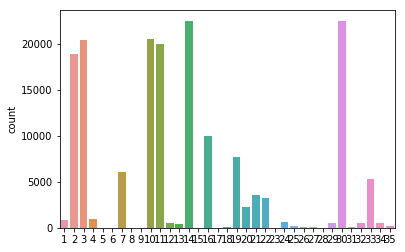

In [287]:
import matplotlib as plt

sns.countplot(Y_train_reduced)


In [273]:
from sklearn.model_selection import train_test_split

In [290]:
X_train_reduced_train,X_test,Y_train_reduced_train,Y_test = train_test_split(X_train_reduced,Y_train_reduced,test_size = 0.33)

In [291]:
ada  = ada.fit(X = X_train_reduced_train, y = Y_train_reduced_train)

In [292]:
Y_pred = ada.predict_proba(X_test)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [280]:
accuracy_score(Y_test,Y_pred)

0.6388998517816893

In [293]:
log_loss(Y_test,Y_pred)

ValueError: y_true and y_pred contain different number of classes 34, 35. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35]

In [161]:
Y_pred.shape

(509113, 36)

In [165]:
X_test = test

In [174]:
sm = SelectPercentile(percentile=70).fit(X_train,Y_train.ravel())

In [208]:
X_train_new = X_train[X_train.columns[[ 0,  1,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21,
       24, 25, 26, 27, 28, 29, 30]]]

In [178]:
sm.get_support(indices=True)

array([ 0,  1,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21,
       24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [195]:
X_test_selected.shape

(10000, 24)

In [196]:
Y_pred_final = ada.predict_proba(X_test_selected)

In [200]:
cat_encoder.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PROSTITUTION',
       'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
       'SEX OFFENSES FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [202]:
result=pd.DataFrame(Y_pred_final,columns=cat_encoder.classes_)

In [205]:
result['Id']=test['Id']

In [206]:
result.shape

(10000, 37)

In [207]:
result.to_csv("UndeSampling.csv", index=False,index_label='Id')

In [236]:
X_train_reduced

array([[ 3.49300000e+03, -1.22403405e+02,  2.01200000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.21000000e+03, -1.22425110e+02,  2.00400000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 4.05000000e+03, -1.22443585e+02,  2.01400000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 4.52600000e+03, -1.22412563e+02,  2.00600000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.46000000e+03, -1.22394591e+02,  2.00600000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.74500000e+03, -1.22455054e+02,  2.00800000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [241]:
X_train

,Address,X,Y,Year,Month,Day,Hour,Minute,BAYVIEW,CENTRAL,...,StreetNo,Intersection,Morning,Noon,Evening,Night,Fall,Winter,Spring,Summer
0,4423,-122.419331,37.762264,2013,6,28,17,40,0,0,...,2100,0,0,0,1,0,0,1,0,0
1,4354,-122.411340,37.781271,2004,2,19,2,46,0,0,...,1000,0,0,0,0,1,0,0,0,1
2,3493,-122.403405,37.775421,2007,11,14,0,1,0,0,...,800,0,0,0,0,1,0,0,1,0
3,4773,-122.404715,37.730161,2007,12,27,18,30,1,0,...,2400,0,0,0,1,0,0,0,0,1
4,1760,-122.405239,37.785265,2012,9,9,17,2,0,0,...,0,1,0,0,1,0,0,0,1,0
5,189,-122.418405,37.766760,2014,5,14,6,14,0,0,...,0,1,1,0,0,0,1,0,0,0
6,4353,-122.404651,37.790442,2006,8,9,23,45,0,1,...,0,0,0,0,0,1,0,1,0,0
7,4645,-122.410871,37.737526,2012,11,16,12,41,0,0,...,100,0,0,1,0,0,0,0,1,0
8,7992,-122.405911,37.732964,2007,2,5,23,53,1,0,...,0,1,0,0,0,1,0,0,0,1
9,6677,-122.417710,37.784236,2006,2,7,7,41,0,0,...,0,1,1,0,0,0,0,0,0,1
